## Defining The Problem
>> Determine the survival of passengers that were on board on the Titanic Ship given information about them. 

In [139]:
# import the python libraries needed 
# data preparation, analysis & cleaning 
import numpy as np
import pandas as pd
# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [140]:
# load the data sets 
# gender_submission dataset
gender = pd.read_csv('gender_submission.csv')
gender.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [141]:
# test data set
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [142]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* The train Data set represents the details of the passengers on board in the Titanic and if the passenger survived or died in the sinking of the ship.

In [143]:
# import pandas_profiling to geneate profile report of the train dataset
import pandas_profiling
# generating the report
train.profile_report()

## Data Cleaning And Analysis

In [144]:
# the shape and size of the dataset
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

Train data shape: (891, 12)
Test data shape: (418, 11)


In [145]:
# brief description of the data sets
train.info()
print("\n")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null flo

In [146]:
# dealing with missing values
train['Age'].fillna(train['Age'].mean(), inplace = True)
test['Age'].fillna(test['Age'].mean(), inplace = True)
# column embarked has missing values that will replace with mode after feature engineering

In [147]:
# Checking for missing values 
print(train.isnull().sum())
print('\n')
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64




PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

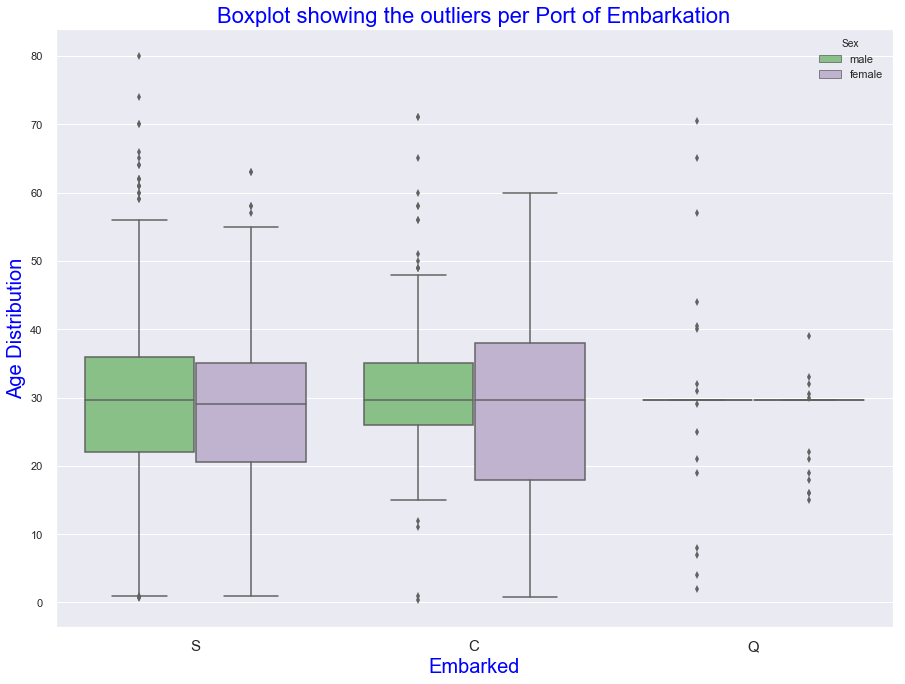

In [148]:
# sns.boxplot(train['Age'], color = 'red')
plt.figure(figsize = (15,11))
sns.boxplot(train['Embarked'],train['Age'] , hue = train['Sex'], palette = 'Accent')
plt.ylabel('Age Distribution', fontsize = 20, color = 'blue')
plt.xticks(fontsize = 15)
plt.xlabel('Embarked',fontsize = 20, color = 'blue')
plt.title('Boxplot showing the outliers per Port of Embarkation', fontsize = 22, color = 'blue')
plt.show()

the following conclusion can be made from the above chat:
    * The was alot of old passengers who embarked the ship at port S compared to C and Q 
    * Port Q saw many young males embark the ship compared to S and Q.
    * At port S and Q more male embarked the ship than female while at port C more female embarked the ship than male.
    * Few passengers Embarked the ship at Port Q compared to both C and S.

In [149]:
# dropping the unnecessary colums 
train.drop(['Name', 'Ticket','Fare','Cabin'], axis = 1, inplace = True)
test.drop(['Name', 'Ticket','Fare','Cabin'],axis = 1, inplace = True)

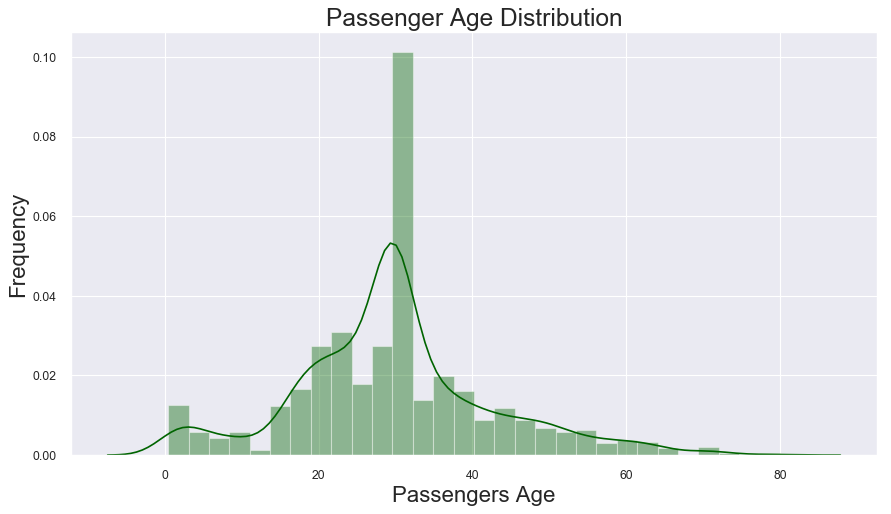

In [150]:
# the distribution of age 
age = train['Age']
# plotting a histogram 
plt.figure(figsize=(13,7), dpi= 80)
# plt.hist(age, bins = 10, histtype = 'bar', rwidth = 0.9, color = 'black')
sns.distplot(train['Age'], color = "darkgreen", label = "Age" )
# labeling the axis 
plt.ylabel('Frequency', fontsize = 20)
plt.xlabel('Passengers Age', fontsize = 20)
# title
plt.title('Passenger Age Distribution', fontsize = 22)
plt.show()

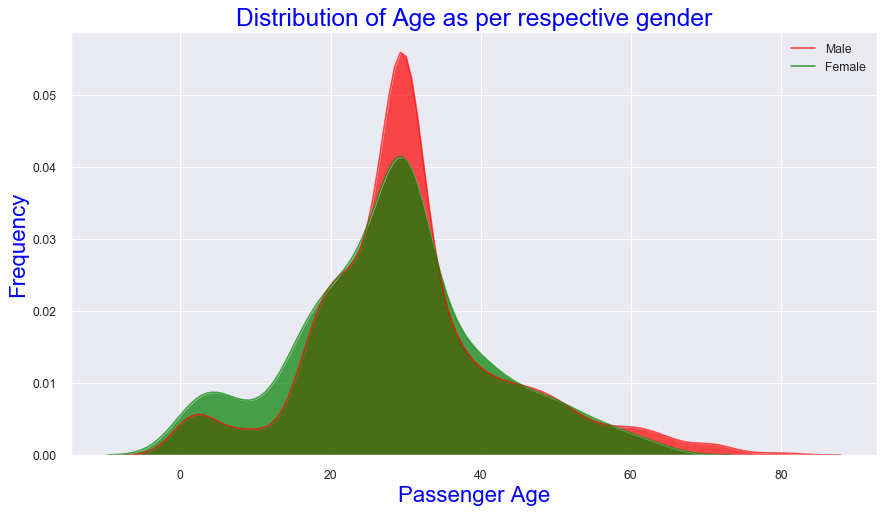

In [151]:
# distribution of Age of the different genders in the ship
plt.figure(figsize=(13,7), dpi= 80)
sns.kdeplot(train.loc[train['Sex'] == 'male', "Age"], shade=True, color="red", label="Male", alpha=.7)
sns.kdeplot(train.loc[train['Sex'] == 'female', "Age"], shade=True, color="green", label="Female", alpha=.7)
plt.title('Distribution of Age as per respective gender', fontsize = 22, color = 'blue')
plt.ylabel('Frequency', fontsize = 20, color = 'blue')
plt.xlabel('Passenger Age', fontsize = 20, color = 'blue')
plt.show()

From the above chart , the following conclusions can be made:
* There are more young females than males in the titanic who are less than 20 years.
* Between 20 and 40 years, there are more male than female. 
* Passengers aged more than 40 years contain more male than female also.

Age is Most likely to indicate who survived or not during the sinking of the boat.

In [152]:
#Creating Visualisation of passengers who survived or died 
def plot(passenger_info):
    survived = train[train.Survived == 1][passenger_info].value_counts()
    not_survived = train[train.Survived == 0][passenger_info].value_counts()
    df = pd.DataFrame([survived, not_survived])
    df.index = ['Survived', 'Not_survived']
    sns.set()
    df.plot(kind = 'bar', stacked = 'True', figsize = (14, 8))
    plt.xticks(fontsize = 18)

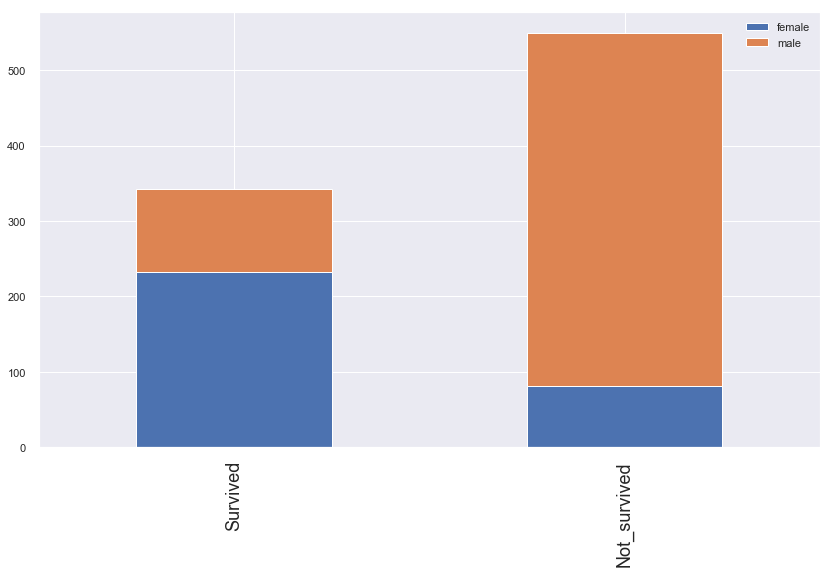

In [153]:
# passengers who survived based on gender 
plot('Sex')

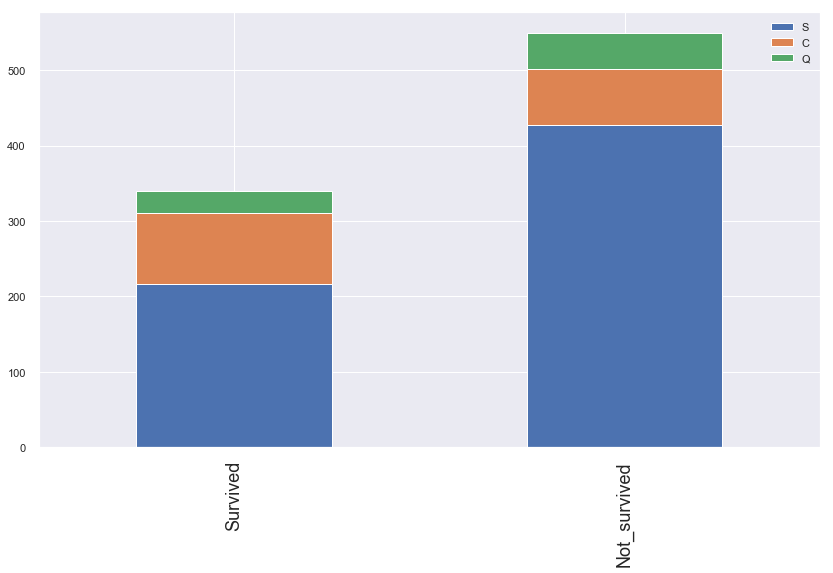

In [154]:
# passengers who survived based on place they embarked 
plot('Embarked')

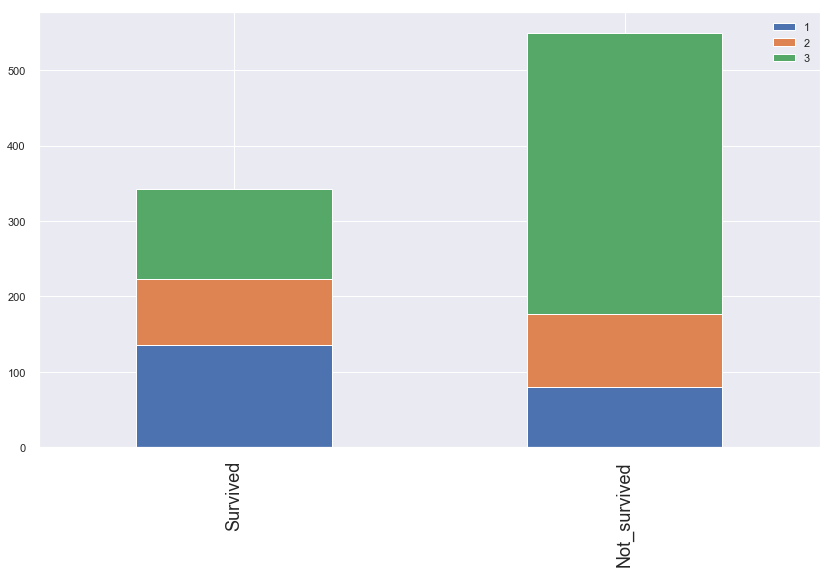

In [155]:
# based on the class
plot('Pclass')

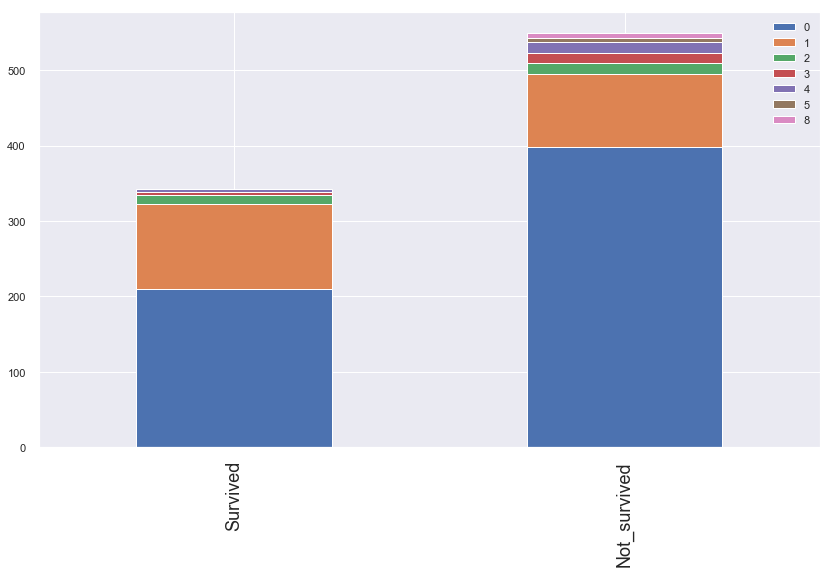

In [156]:
plot('SibSp')

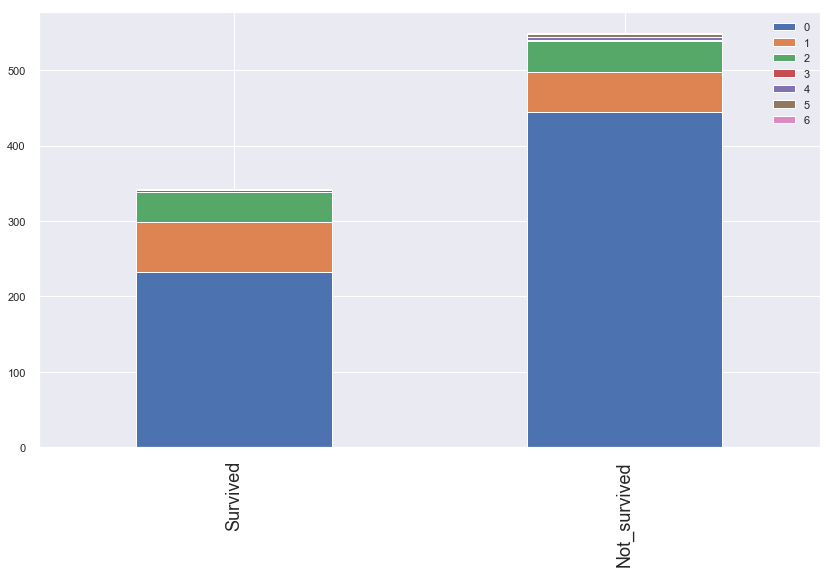

In [157]:
plot('Parch')

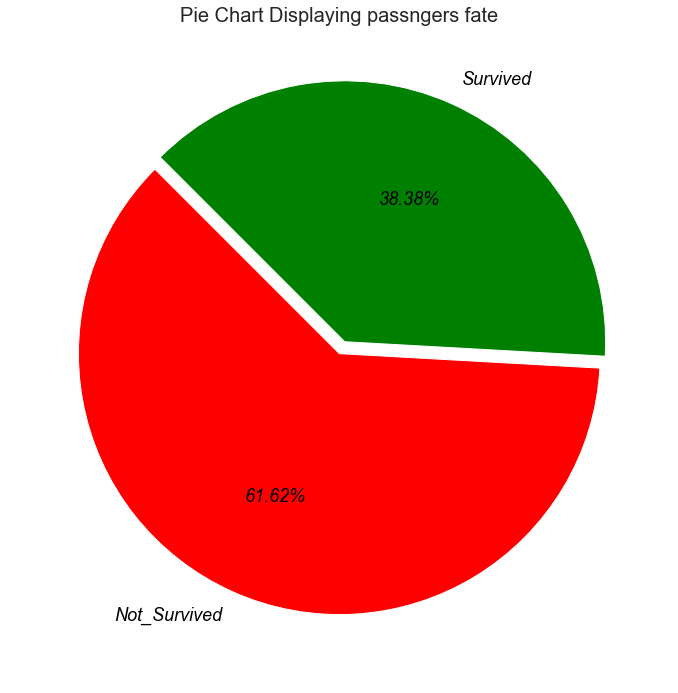

In [158]:
survive = train.groupby(['Survived'])['Survived'].count()
survive
plt.figure(figsize = (16, 12))
explode = (0,0.05)
labels = (['Not_Survived' , 'Survived'])
colors = ['Red','Green']
plt.pie(survive.values, labels = labels, explode = explode, autopct = '%1.2f%%', colors = colors, startangle = 135, textprops = {'color':'black', 'style': 'oblique', 'size':18})
plt.title('Pie Chart Displaying passngers fate', fontsize = 20)
plt.show()

## Feature Engineering 
>> The Data set has columns Sex and Embarked containing categorical data . Feature engineering involves convertig the categorical data into numerical data which will be used for machine learning. Embarked column also has 2 missing values which can be replaced with the mode

In [164]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.000000,1,0,S
1,2,1,1,female,38.000000,1,0,C
2,3,1,3,female,26.000000,0,0,S
3,4,1,1,female,35.000000,1,0,S
4,5,0,3,male,35.000000,0,0,S
5,6,0,3,male,29.699118,0,0,Q
6,7,0,1,male,54.000000,0,0,S
7,8,0,3,male,2.000000,3,1,S
8,9,1,3,female,27.000000,0,2,S
9,10,1,2,female,14.000000,1,0,C


In [165]:
test.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S
5,897,3,male,14.0,0,0,S
6,898,3,female,30.0,0,0,Q
7,899,2,male,26.0,1,1,S
8,900,3,female,18.0,0,0,C
9,901,3,male,21.0,2,0,S


In [161]:
train.isnull().sum()
test.isnull().sum()
# replacing null value in train embarked column
train['Embarked'].value_counts()
train['Embarked'].fillna('S', inplace = True) # replaced using the mode of the stations 

In [167]:
# using label encoder for feature engineering
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder 
label_encoder = LabelEncoder()

In [176]:
# encode labels in column sex and embarked
cols = ['Sex','Embarked']
# using a loop 
for col in cols:
    train[col] = label_encoder.fit_transform(train[col])
    test[col] = label_encoder.fit_transform(test[col])


In [177]:
# data used to train the model
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,2
1,2,1,1,0,38.0,1,0,0
2,3,1,3,0,26.0,0,0,2
3,4,1,1,0,35.0,1,0,2
4,5,0,3,1,35.0,0,0,2


In [178]:
# data used for testing
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,1,34.5,0,0,1
1,893,3,0,47.0,1,0,2
2,894,2,1,62.0,0,0,1
3,895,3,1,27.0,0,0,2
4,896,3,0,22.0,1,1,2


* Columns Embarked and Sex have been converted from categorical.
* On the embarked column ,C is represented by 0, Q is representded by 1 & S is represented by 2 while on the sex column male is represented by 1 while female is 0.

In [179]:
# splitting the train data into attributes and label
test_features = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
X = train[test_features].values

y = train['Survived'].values

In [180]:
# splitting into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Machine learning

### Logistic regression

In [187]:
# fitting the logistic regression
regressor = LogisticRegression(random_state = 42)
regressor.fit(X_train, y_train)

/home/antonny/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [188]:
# retrieve the intercept 
print(regressor.intercept_)
# retrieve the coeffecient 
print(regressor.coef_)

[3.62433562]
[[ 5.80224123e-04 -8.23495571e-01 -2.47139881e+00 -2.01490986e-02
  -2.32416412e-01 -5.28917821e-02 -1.84002589e-01]]


In [189]:
# use the model to make prediction 
y_pred = regressor.predict(X_test)

In [190]:
# create a data frame for comparison
regressor_df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
regressor_df.head()

,Actual,Predicted
0,1,0
1,0,0
2,0,0
3,1,1
4,1,1


In [191]:
# model metrics
print('Model performance based on confusion matrix report:')
confusion_matrix(y_test, y_pred, labels = [0,1])

Model performance based on confusion matrix report:


array([[90, 15],
       [22, 52]])

* True Positive : 90 - correctly predicted those who didn't survive 
* False Positive : 15 - survived but predicted as not survived
* True Negative : 52 - correctly predicted those who survived
* False Negative : 20 - didn't survive but predicted as survived

In [192]:
print('Accuracy score of the model is',np.round((accuracy_score(y_test, y_pred)*100),4), '%')

Accuracy score of the model is 79.3296 %


The model has an accuracy of 79.33% . The accuracy of the model can be improved by fine tunning the regressor or using another model. Decision trees can be used to improve the model performance.

### Decision Trees Algorithm

In [193]:
# fitting the decisiontree classifier 
desClf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3,
                                min_samples_split = 5, random_state = 42)
desClf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [194]:
# use the model to make prediction
desClf_pred = desClf.predict(X_test)

In [195]:
# Create a data frame for comparison
desClf_df = pd.DataFrame({'Actual': y_test, 'Predicted': desClf_pred})
desClf_df.head()

,Actual,Predicted
0,1,0
1,0,0
2,0,0
3,1,1
4,1,1


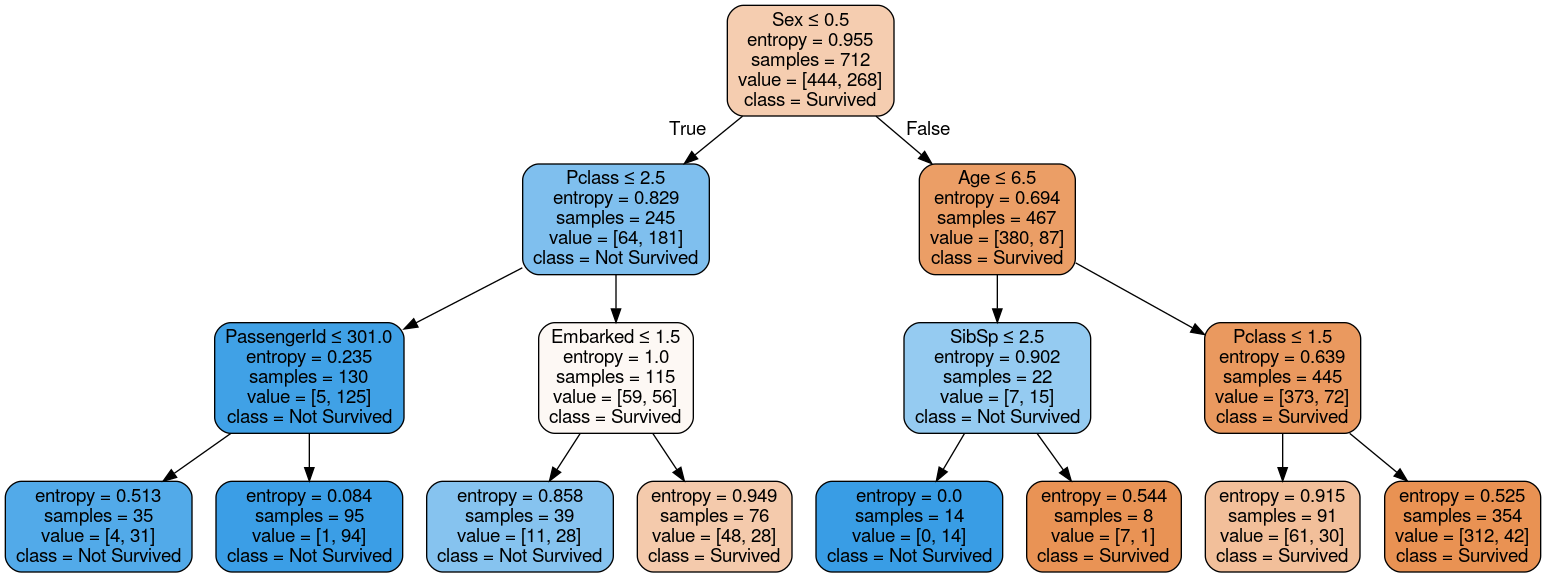

In [196]:
# descision tree clasifier visualtisation
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(desClf.fit(X_train, y_train), out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,
                class_names=['Survived', 'Not Survived'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

In [197]:
# model evaluation 
print('Model evaluation based on the confusion matrix')
confusion_matrix(y_test, desClf_pred)

Model evaluation based on the confusion matrix


array([[95, 10],
       [26, 48]])

In [198]:
print('Accuracy score of the model is',np.round((accuracy_score(y_test, desClf_pred)*100),4), '%')

Accuracy score of the model is 79.8883 %


The model has an accuracy of 79.89%. This is not an improvement compared to logistic regression. will therefore try using Random forest algorithm taking into consideration bias and variance will trying to improve the performance.

### Random Forest Algorithm

In [199]:
# creating a random forest classifier function with 100 number of decision trees
ranf = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth = 6, min_samples_split = 4)
# training on train data 
ranf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [200]:
# use the model to make prediction
ranf_pred = ranf.predict(X_test)

In [201]:
# making comparison
ranf_df = pd.DataFrame({'Actual': y_test, 'Predicted': ranf_pred})
ranf_df.tail(10)

,Actual,Predicted
169,0,0
170,1,0
171,1,1
172,1,0
173,0,1
174,0,0
175,0,0
176,1,0
177,1,1
178,1,1


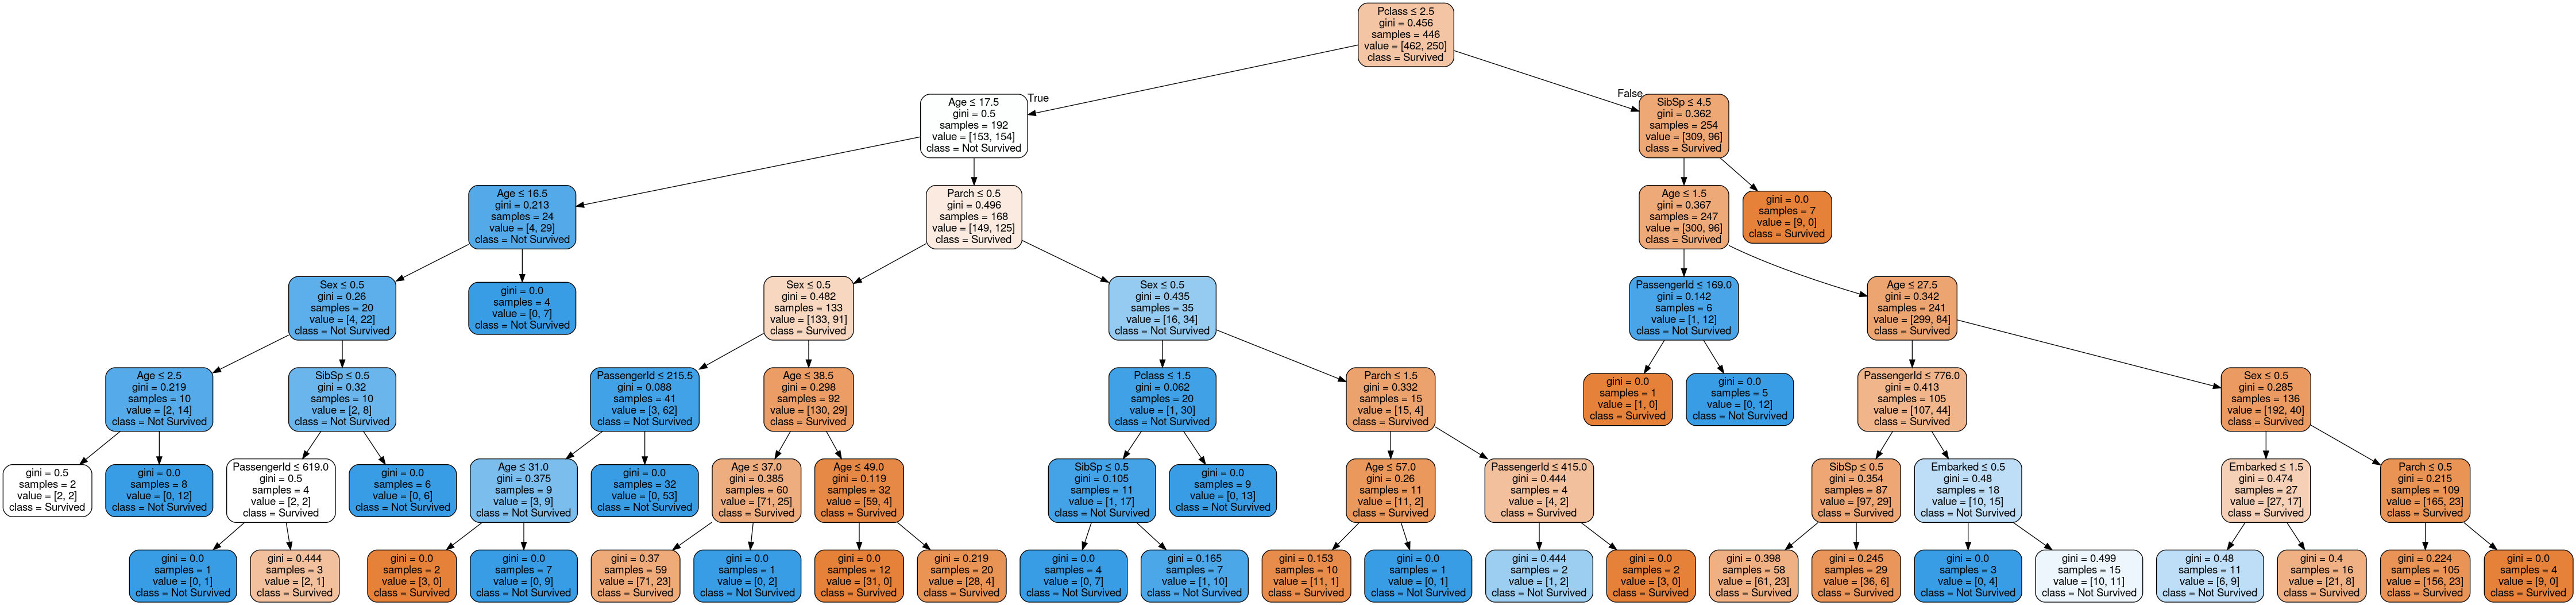

In [202]:
dot_data = StringIO()
# pull out one of the tree from the forest
tree = ranf.estimators_[78]
# export the image to a dot file 
export_graphviz(tree, out_file = dot_data,
               filled = True, rounded = True, special_characters = True,
               feature_names = test_features,
               class_names=['Survived', 'Not Survived'])
# use dot file to create a graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('credit_card_transactions.png')
# write a graph to a png file
Image(graph.create_png())

In [203]:
# model evaluation 
print('Model evaluation based on the confusion matrix')
confusion_matrix(y_test, ranf_pred)

Model evaluation based on the confusion matrix


array([[94, 11],
       [21, 53]])

In [204]:
print('Accuracy score of the model is',np.round((accuracy_score(y_test, ranf_pred)*100),4), '%')

Accuracy score of the model is 82.1229 %


This algorithm has an accuracy of 82.12% . This is an improvement compared to the previous models. The accuracy of the model is not that great but it can be used to make predictions

## Making predictions on the Test set 

In [205]:
# making predictions on the test data set 
pred = ranf.predict(test)

In [206]:
# creating a dataframe 
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': pred})
# display the last 10 rows
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [207]:
submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [208]:
# Converting
antonny_titanic = submission.to_csv('antonny_titanic.csv', index = False)